# Introduction to Seaborn and Multiple DataSeriesPlotting



In this lecture we will learn:



- How to work with Seaborn.


- How to plot multiple DataSeries into one plot. 


## Introduction to Seaborn



Seaborn is a data visualization library that was created to complement matplotlib and it is closely integrated with pandas data structures. Some of the advantages of this library are:


- Streamlines the amount of code needed to create matplotlib visualizations;


- Enables us to easily work with pandas dataframes which is a big advantage over matplotlib;


- Provides specialized support for using categorical variables;


- Has functions to examine relationships between multiple variables;


- Provides convenient views onto the overall structure of complex datasets.

### Getting Started



Let's proceed with importing our libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Basic Plots

Before we move on to some 'real life' examples of plotting, let us first examine two basic plots - the line plot and the scatter plot - to get the gist of working with Seaborn. 

### Line Plots


Let's begin with a simple, artificial example of a line plot. To make this plot, we will first create some artificial data. 

In [8]:
data = pd.DataFrame()
data['X'] = np.arange(0,10,1)
data['Y'] = data['X']**2 
data['Z'] = data['Y']**2

In [9]:
data

,X,Y,Z
0,0,0,0
1,1,1,1
2,2,4,16
3,3,9,81
4,4,16,256
5,5,25,625
6,6,36,1296
7,7,49,2401
8,8,64,4096
9,9,81,6561


Now that we have our DataFrame, we can plot the data using Seaborn.

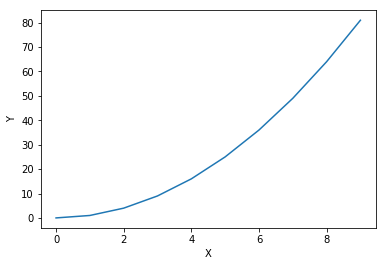

In [10]:
sns.lineplot(data.X, data.Y) 

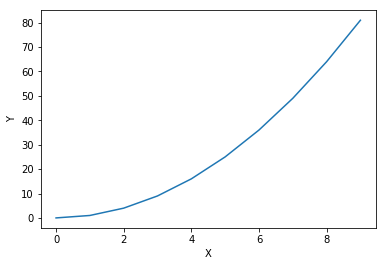

In [12]:
sns.lineplot("X", "Y", data = data) 

### Scatter Plots


Here we use the Seaborn lmplot function (lm stand for linear model) and set the option to fit the regression line to false.

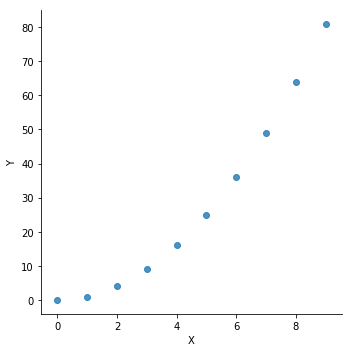

In [13]:
sns.lmplot("X", "Y", data=data, fit_reg=False) 

As we can see, here it is also possible to enhance a scatter-plot to include a linear regression model.

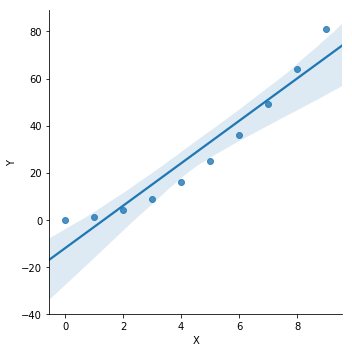

In [16]:
sns.lmplot("X", "Y", data=data, fit_reg=True)

### Using Pandas

Let us now look at how we can plot some real life data using Seaborn.

### Working on Dataframes Using Seaborn


Let's start by reading the 'vehicles.csv' file.

In [17]:
data = pd.read_csv('vehicles.csv') 
data.head()

,Unnamed: 0,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


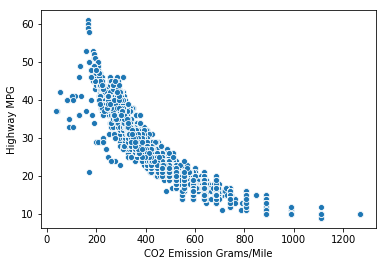

In [18]:
sns.scatterplot(x="CO2 Emission Grams/Mile", y="Highway MPG", data=data)

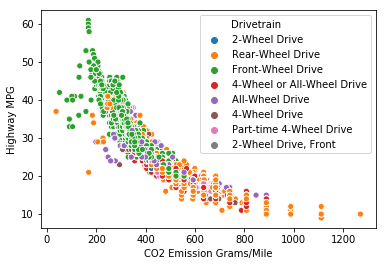

In [19]:
sns.scatterplot(x="CO2 Emission Grams/Mile", y="Highway MPG", hue="Drivetrain", data=data)

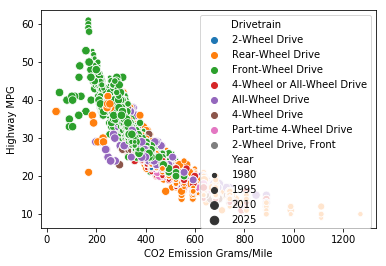

In [20]:
sns.scatterplot(x="CO2 Emission Grams/Mile", y="Highway MPG", hue="Drivetrain", size = "Year", data=data)

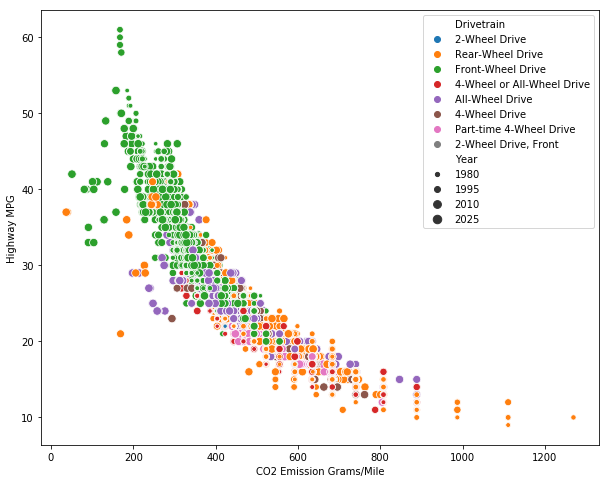

In [24]:
plt.subplots(figsize=(10,8))
#include dot size version
sns.scatterplot(x="CO2 Emission Grams/Mile", y="Highway MPG", hue="Drivetrain", size = "Year", data=data)

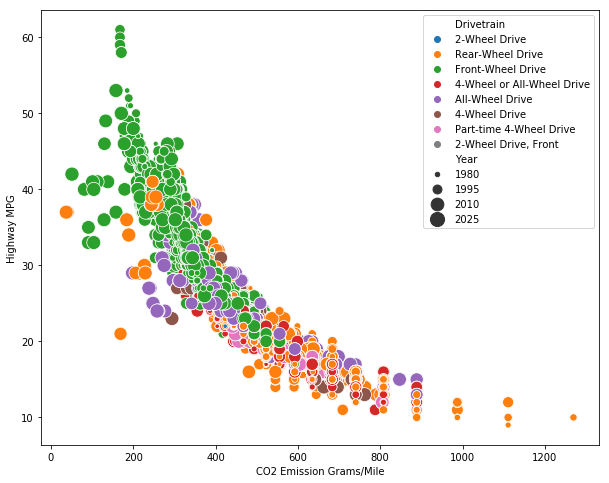

In [25]:
plt.subplots(figsize=(10,8))
#include dot size version
sns.scatterplot(x="CO2 Emission Grams/Mile", y="Highway MPG", hue="Drivetrain", size = "Year", sizes=(20, 200), data=data)

In [28]:
#tips 
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


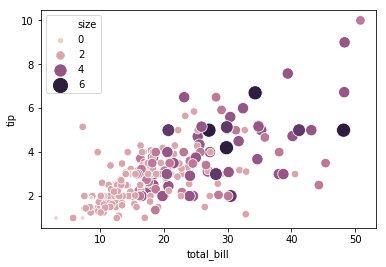

In [33]:
sns.scatterplot(x="total_bill", y="tip", hue="size", size="size", sizes=(20, 200), data=tips)

### Relplot



The relplot function is used to make plots that display a relationship (hence 'rel') between any two variables. Keep in mind that we can often create the same plot with other functions such as the sns.scatterplot functions we've seen before. 


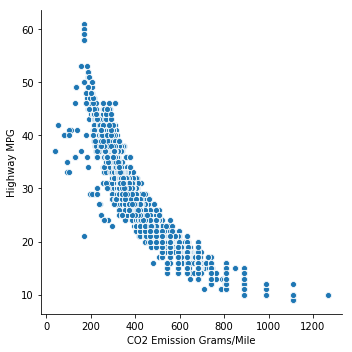

In [34]:
sns.relplot(x='CO2 Emission Grams/Mile', y='Highway MPG', data=data)

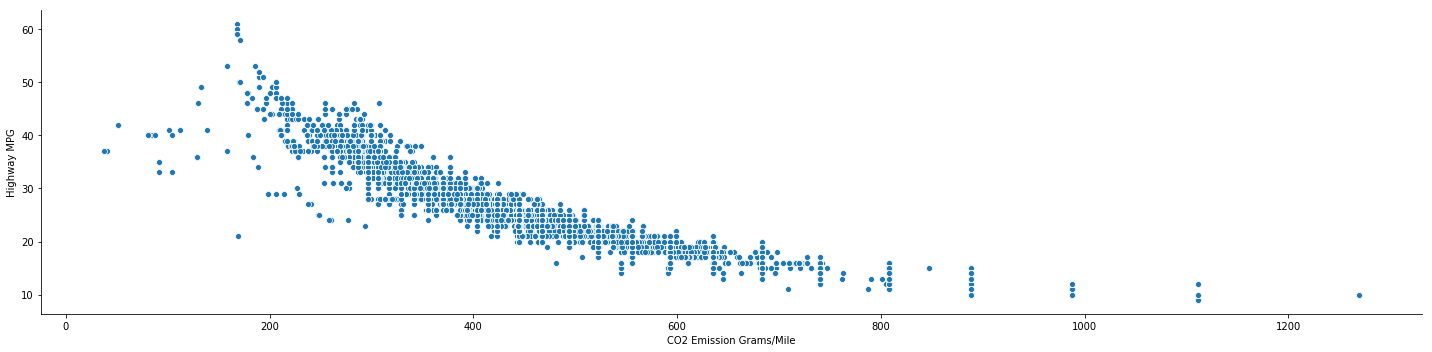

In [35]:
sns.relplot(x='CO2 Emission Grams/Mile', y='Highway MPG', data=data, aspect = 4)

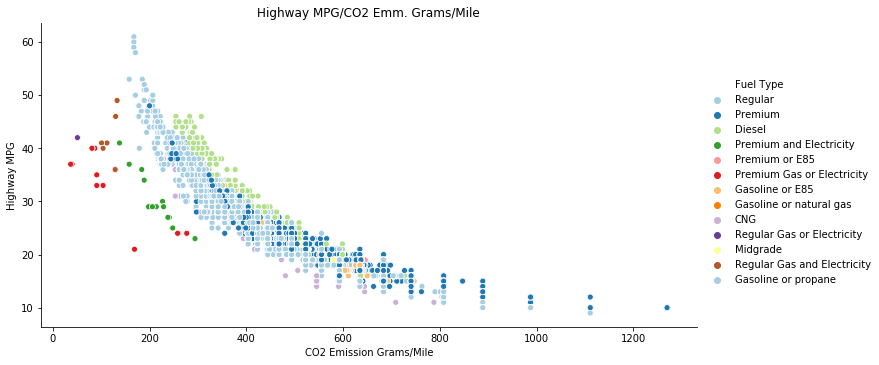

In [84]:
# palette
sns.set_palette('Paired', 10)
sns.relplot(x='CO2 Emission Grams/Mile', y='Highway MPG', hue="Fuel Type", data=data, aspect = 2, palette="Paired")
plt.title('Highway MPG/CO2 Emm. Grams/Mile')

plt.show()

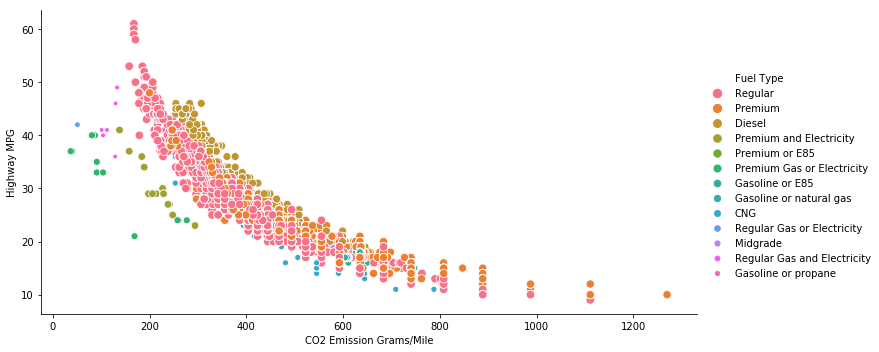

In [42]:
sns.relplot(x='CO2 Emission Grams/Mile', y='Highway MPG', hue="Fuel Type", size="Fuel Type", data=data, aspect = 2)

### Catplot



The catplot function is function specialized for categorical plots. They are used to show the relationship between a numerical and one or more categorical variables.

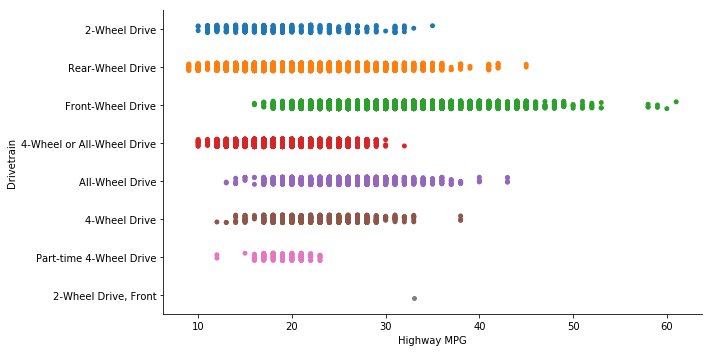

In [43]:
sns.catplot(x="Highway MPG", y="Drivetrain", data=data, aspect = 2)

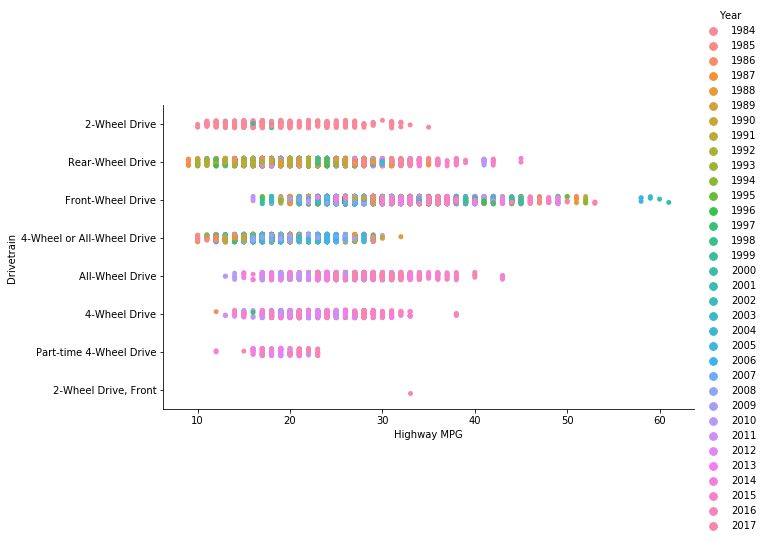

In [44]:
sns.catplot(x="Highway MPG", y="Drivetrain", hue ="Year",  data=data, aspect = 2)

### Lineplots

Lineplots are used to show the evolution of a given variable over time. 

In [45]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [46]:
# A signal is everything that intentionally changes or maintains the behavior of the receiver. 
# A cue is everything that unintentionally changes or maintains the behavior of the receiver.
# (Source: http://ethologyjournal.org/index.php/EI/article/view/17)
fmri['event'].value_counts()

stim    532
cue     532
Name: event, dtype: int64

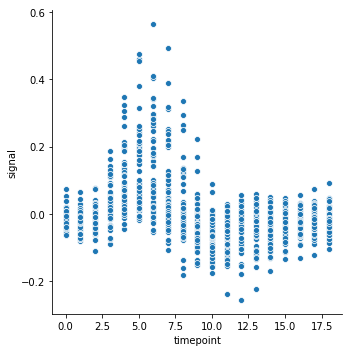

In [47]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri)

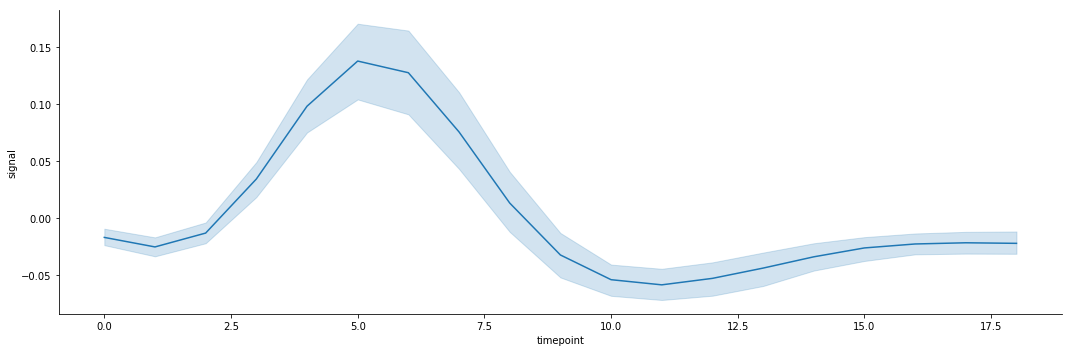

In [48]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, aspect =3)

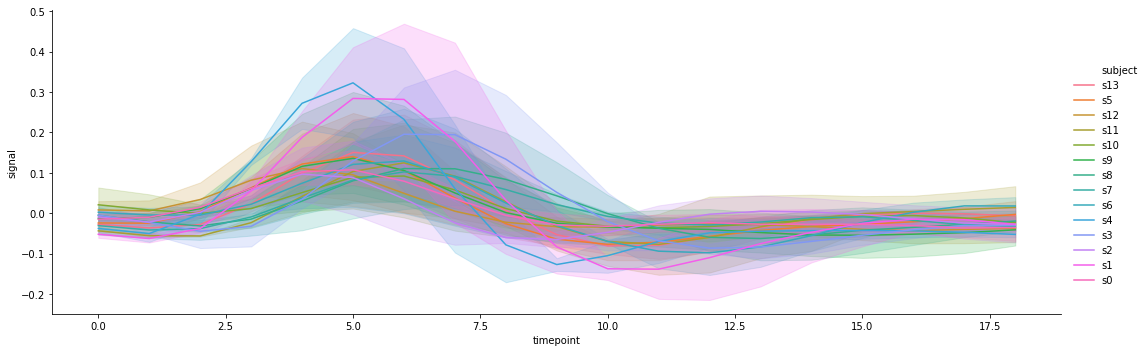

In [49]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', hue = 'subject', data = fmri, aspect =3)

### Violinplots

To better understand how a particular variable is distributed, we could use a violin plot.

In [50]:
data = pd.read_csv('vehicles.csv') 

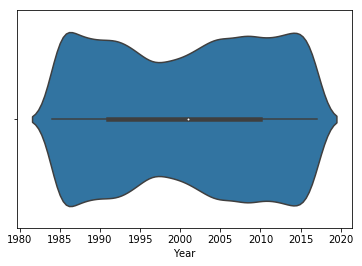

In [51]:
sns.violinplot("Year", data=data)

Another way, of course, is using the distplot. 

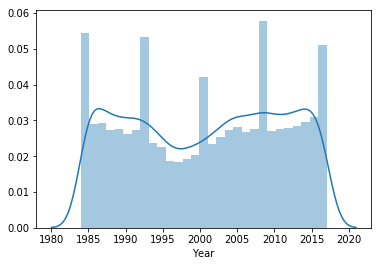

In [52]:
sns.distplot(data["Year"])

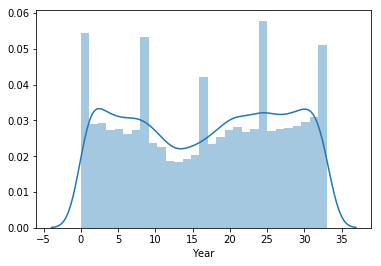

In [53]:
sns.distplot(data["Year"] - data["Year"].min())

# Plotting Multiple Data Series 

## Introduction 


There are many cases when a more elaborate visualization can help us understand our data better. Therefore, in this part of the lesson we will focus on generating such visualizations.

## Multiple Line Plots


Let us now have a look at how we can plot multiple lines. In this case, we will use stock data.

In [54]:
stocks_AABA = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/AABA_2006-01-01_to_2018-01-01.csv')
stocks_CVX = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/CVX_2006-01-01_to_2018-01-01.csv')
stocks_JPM = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/JPM_2006-01-01_to_2018-01-01.csv')

In [55]:
# Convert Date to datetime type
concat = pd.concat([stocks_AABA, stocks_CVX, stocks_JPM])
new = pd.to_datetime(concat['Date'])
concat = concat.drop(columns=['Date'])
concat = pd.concat([concat, new], axis=1)

In [57]:
concat

,Open,High,Low,Close,Volume,Name,Date
0,39.69,41.22,38.79,40.91,24232729,AABA,2006-01-03
1,41.22,41.90,40.77,40.97,20553479,AABA,2006-01-04
2,40.93,41.73,40.85,41.53,12829610,AABA,2006-01-05
3,42.88,43.57,42.80,43.21,29422828,AABA,2006-01-06
4,43.10,43.66,42.82,43.42,16268338,AABA,2006-01-09
...,...,...,...,...,...,...,...
3015,108.20,108.46,106.80,107.45,14573385,JPM,2017-12-22
3016,107.20,107.99,106.40,107.02,7403739,JPM,2017-12-26
3017,106.67,107.29,106.67,107.22,9496548,JPM,2017-12-27
3018,107.40,107.84,107.16,107.79,7440555,JPM,2017-12-28


/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


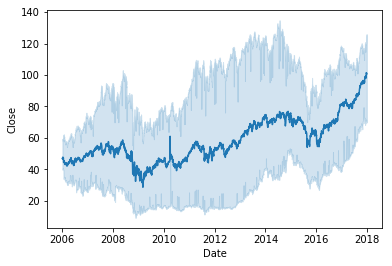

In [58]:
sns.lineplot(x = 'Date', y = 'Close', data = concat)

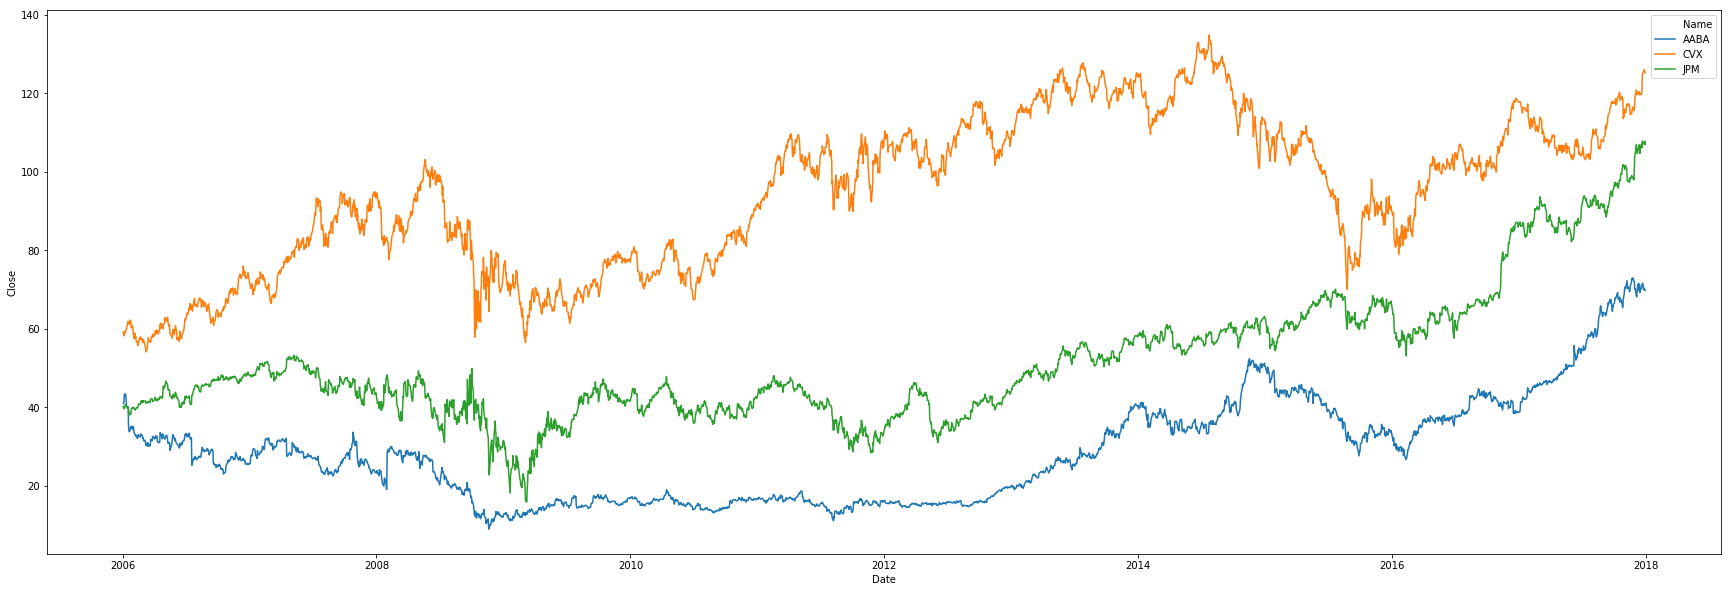

In [59]:
# Add title 
plt.figure(figsize=(30,10))
sns.lineplot(x = 'Date', y = 'Close', hue = 'Name', data = concat)

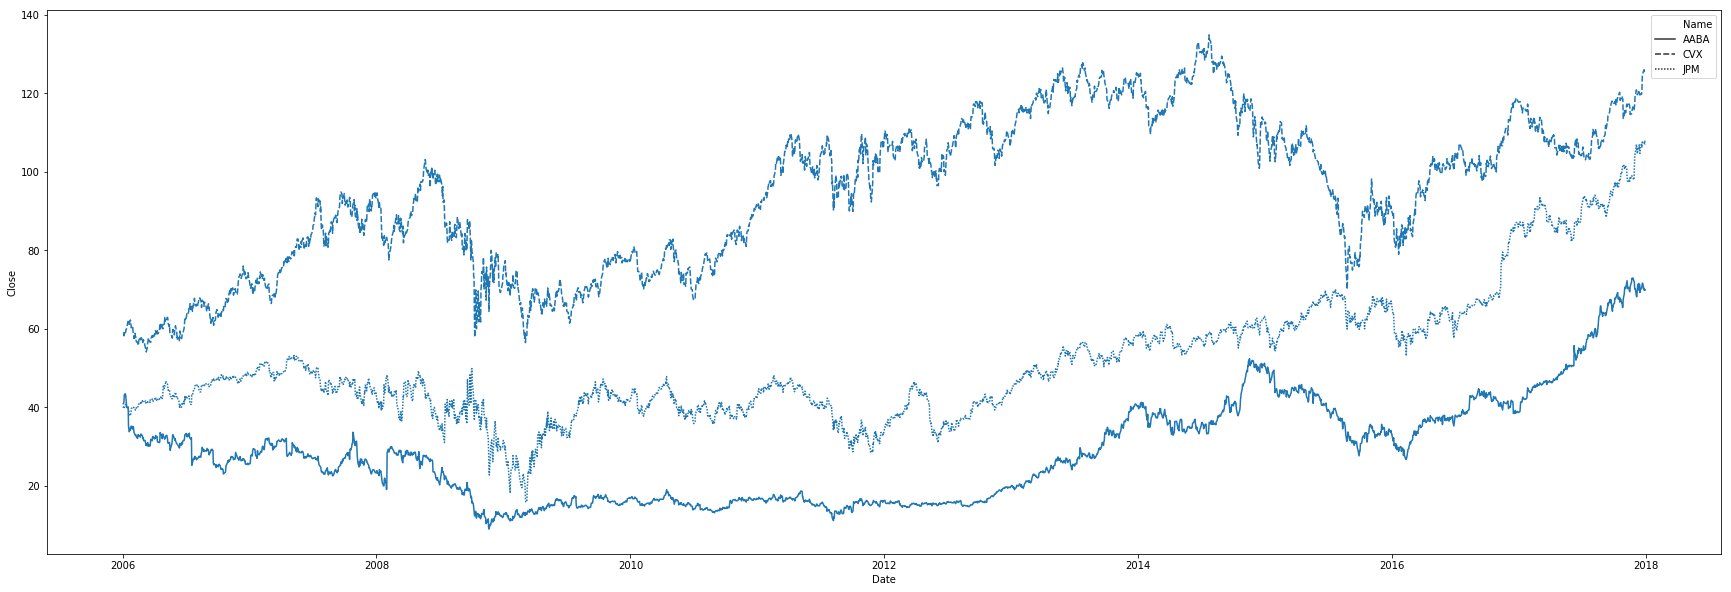

In [60]:
plt.figure(figsize=(30,10))
sns.lineplot(x = 'Date', y = 'Close', style = 'Name', data = concat) 

## Multiple Bar Plots


When plotting categorical data, there is value to plotting two or more groups side by side and being able to compare them. There are a few ways of creating such a plot.

### Side By Side Bar Plots


If we include multiple columns in our bar plot, they will show up side by side in different colors.


In the example below we aggregate both highway and city MPG by drivetrain. Since a bar plot will plot one value per group, we will aggregate and compute the mean.

In [61]:
vehicles = pd.read_csv('vehicles.csv') 

In [62]:
vehicles[["Highway MPG", "City MPG"]].agg("mean")

Highway MPG    23.880646
City MPG       17.646139
dtype: float64

In [63]:
vehicles[["Highway MPG", "City MPG", "Drivetrain"]].groupby(["Drivetrain"]).agg("mean")

,Highway MPG,City MPG
Drivetrain,,
2-Wheel Drive,19.340426,15.624113
"2-Wheel Drive, Front",33.000000,25.000000
4-Wheel Drive,22.741966,16.913989
4-Wheel or All-Wheel Drive,19.633708,15.035061
All-Wheel Drive,25.597352,18.312898
Front-Wheel Drive,28.616759,21.174563
Part-time 4-Wheel Drive,19.088608,14.620253
Rear-Wheel Drive,21.225680,15.422049


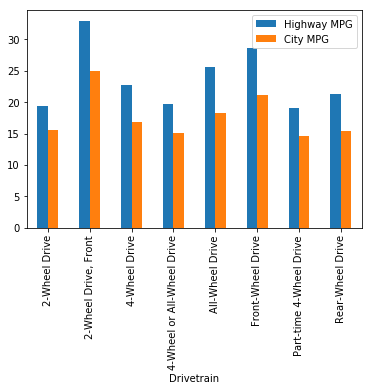

In [65]:
vehicles_mean = vehicles[["Highway MPG", "City MPG", "Drivetrain"]].groupby(["Drivetrain"]).agg("mean")
vehicles_mean.plot.bar()

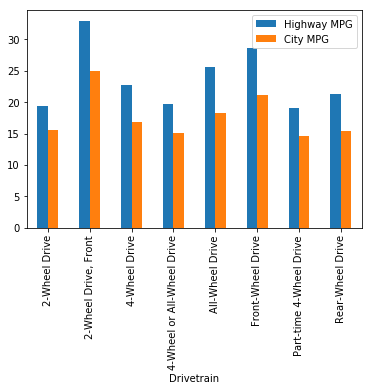

In [67]:
vehicles[["Highway MPG", "City MPG", "Drivetrain"]].groupby(["Drivetrain"]).agg("mean").plot.bar() 

### Side By Side Horizontal Bar Plots


We can use the .barh function to produce horizontal bars.

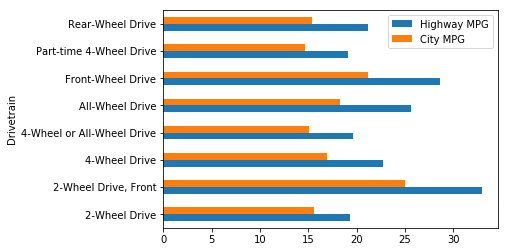

In [70]:
vehicles_mean.plot.barh()

## Scatter Matrices


A scatter matrix is a useful tool particularly in exploratory data analysis. We can look at the pairwise relationships between multiple variables at the same time. Typically what we look for is linear relationships between the pairs of variables. 

We will be using the scatter_matrix function. This function will create a scatter plot for any two numeric variables in our data.


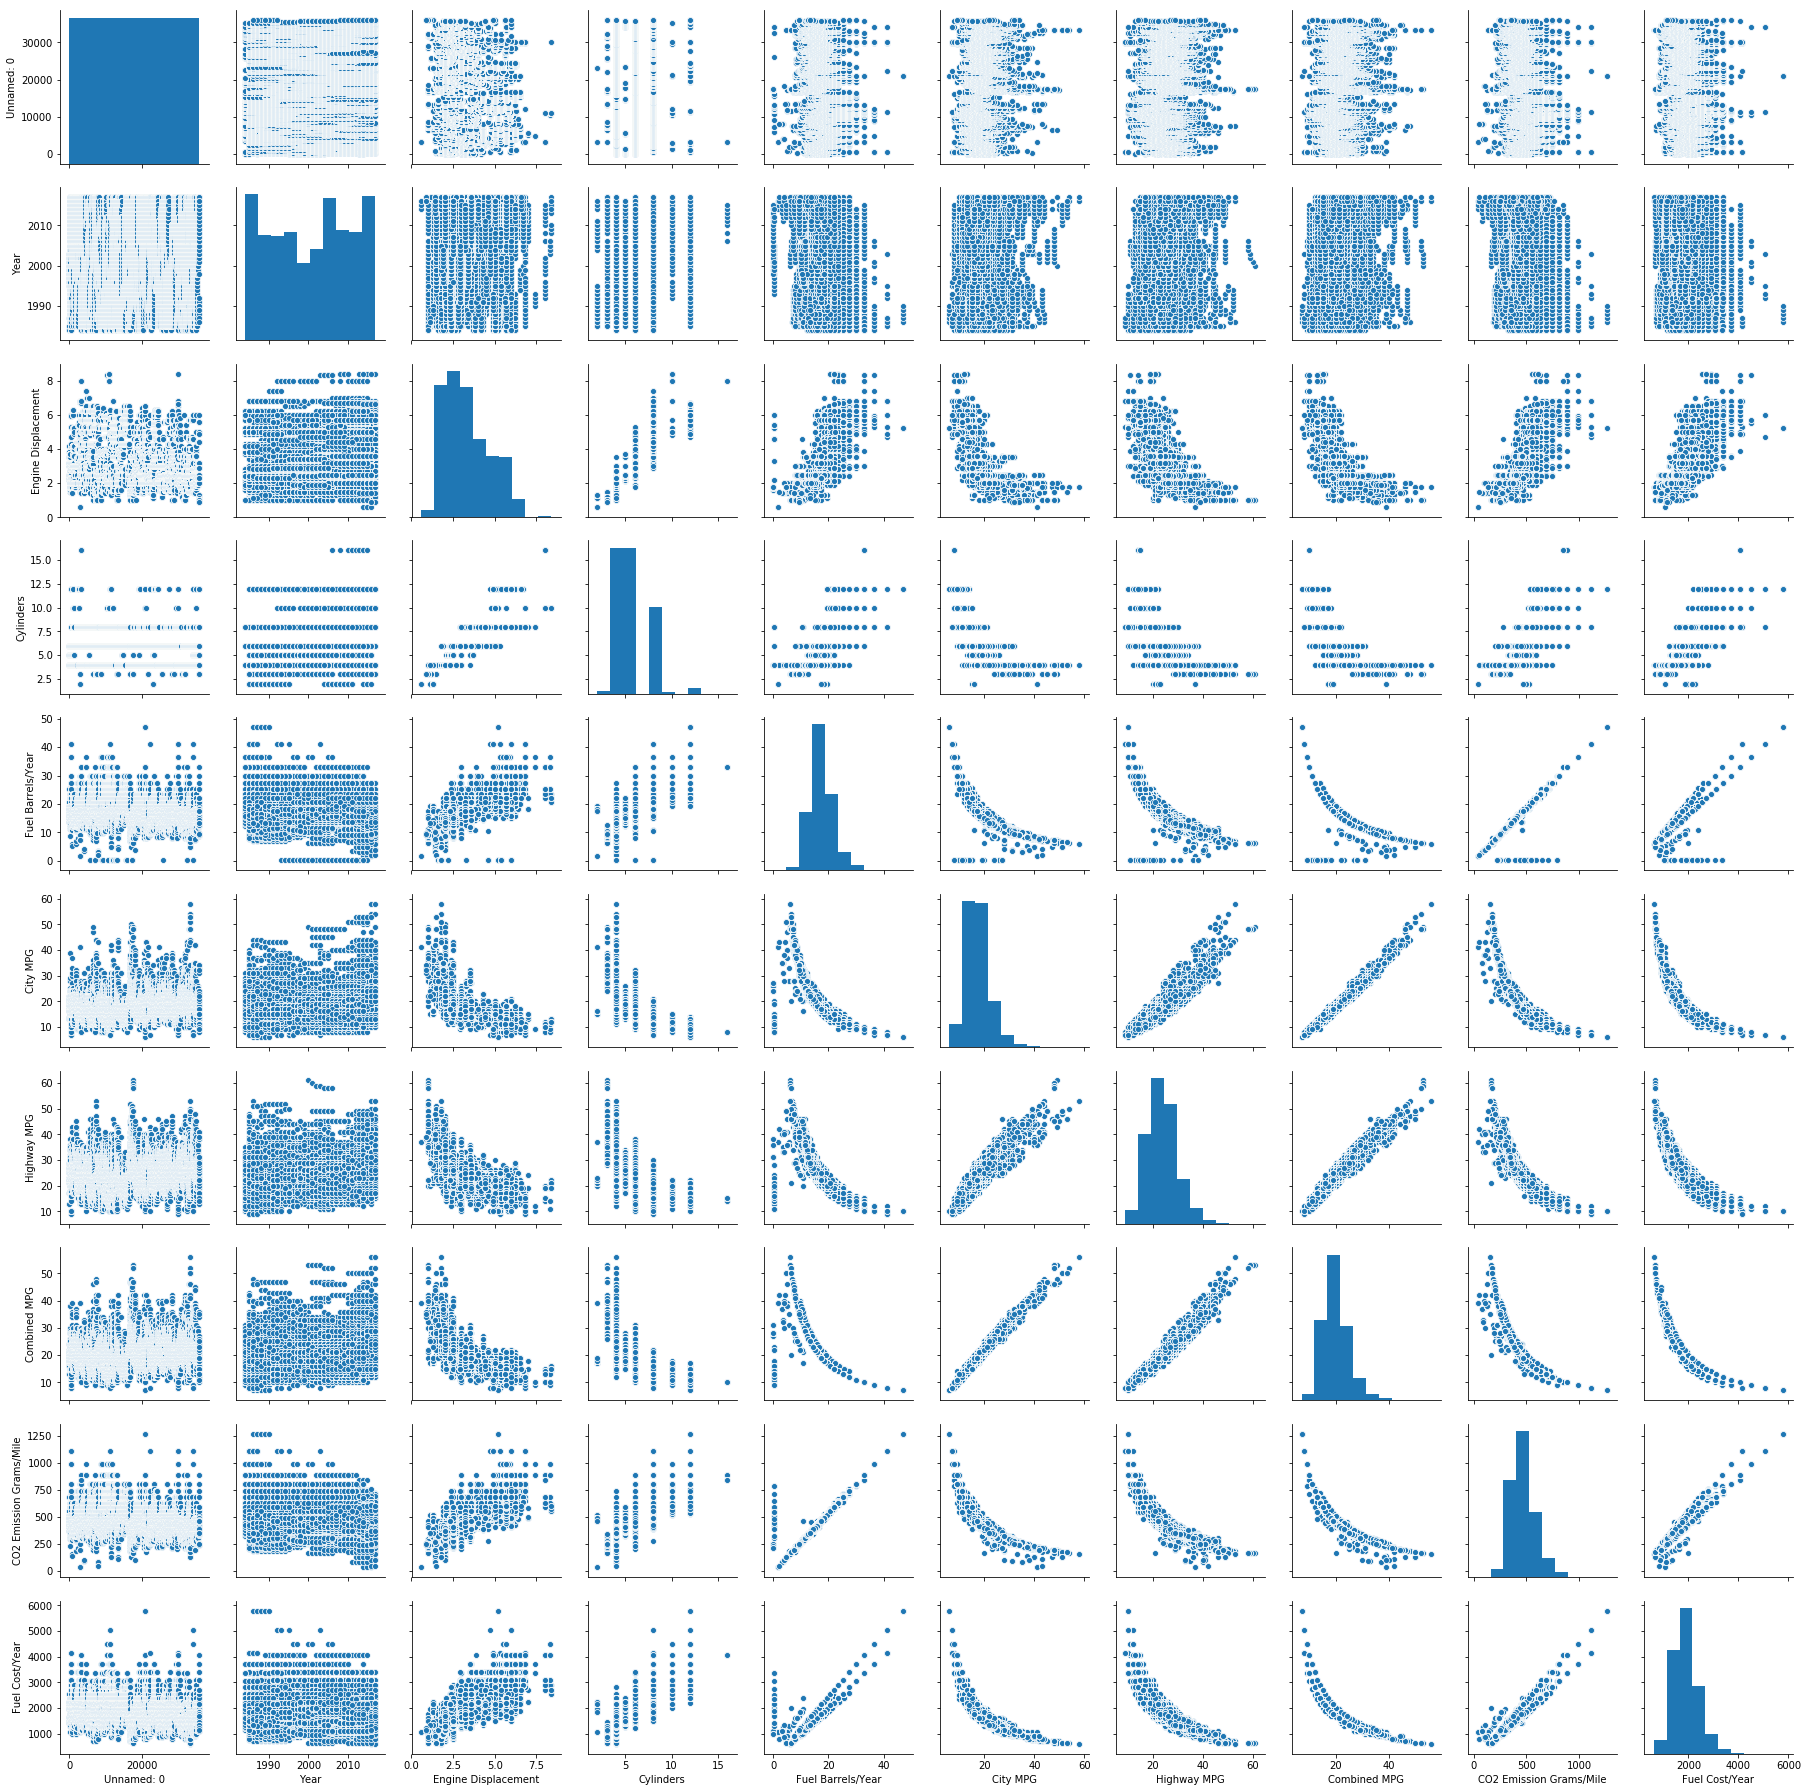

In [71]:
sns.pairplot(vehicles)

In [72]:
flowers = sns.load_dataset("iris")
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


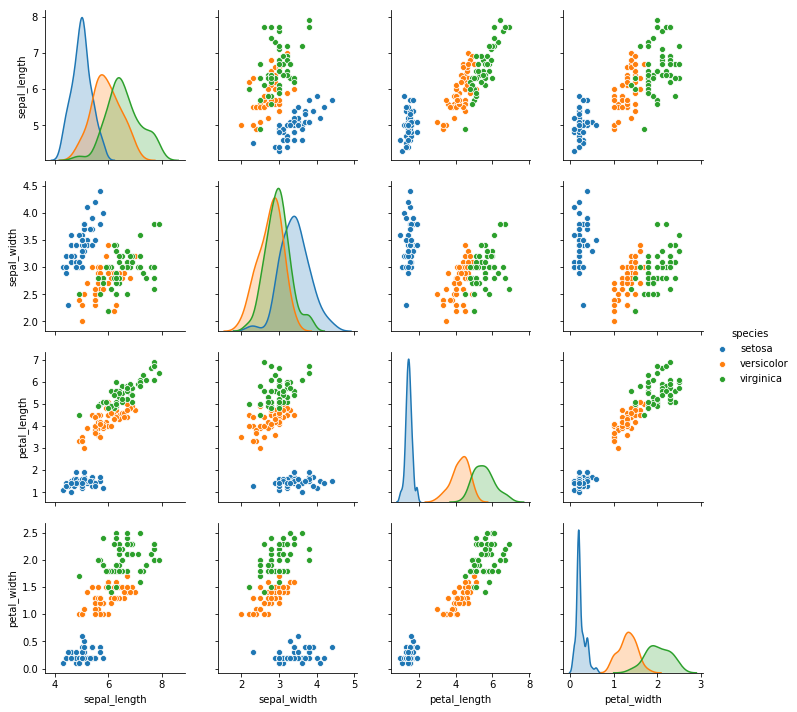

In [73]:
sns.pairplot(flowers, hue = "species")

## Summary



In this lesson we learnt: 

- How to plot visualizations using Seaborn;

- How to plot multiple pieces of information in one chart;

- How to plot two line graphs in one chart as well as two bar graphs;

- How to create a scatter chart with all pairwise combinations in a dataset;